In [2]:

import os
import json

In [7]:
DIR_PATH = 'trained_models/llama-lora-10k/'

In [8]:
dirs = list(filter(lambda x: 'checkpoint' in x,os.listdir(DIR_PATH)))

In [26]:
final_checkpoint = f'checkpoint-{max([int(d.split('checkpoint-')[1]) for d in dirs])}' 

TypeError: can only concatenate str (not "int") to str

In [11]:
log_history = []
for checkpoint in dirs:
    with open(os.path.join(DIR_PATH,checkpoint,'trainer_state.json'),'r') as f:
        log_history += json.load(f)['log_history']

In [20]:
train_epochs = []
eval_epochs = []
train_losses = []
eval_losses = []
for state in log_history:
    if 'loss' in state:
        train_epochs.append(state['epoch'])
        train_losses.append(state['loss'])
    elif 'eval_loss'  in state:
        eval_epochs.append(state['epoch'])
        eval_losses.append(state['eval_loss'])

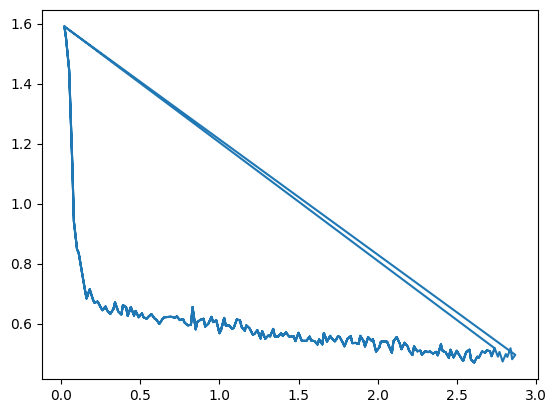

In [21]:
import matplotlib.pyplot as plt

plt.plot(train_epochs,train_losses)

In [24]:
log_history = []
for checkpoint in dirs:
    with open(os.path.join(DIR_PATH,checkpoint,'trainer_state.json'),'r') as f:
        print(checkpoint,len(json.load(f)['log_history']))

checkpoint-1680 189
checkpoint-1760 198
checkpoint-1600 180


In [ ]:
json.load(f)